# 0.1 - Time Series, Custom Class

In [1]:
# Import to be able to import python package from src
import sys

sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import ontime as on

C:\Users\vince\AppData\Local\pypoetry\Cache\virtualenvs\ontime-FclhqCOu-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
## Generation of random time series

In [3]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [4]:
ts[0:5]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[ 2.00073295]],

       [[ 1.7023812 ]],

       [[-0.29720943]],

       [[-0.34343923]],

       [[ 0.03902981]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---
## Use `TimeSeries` object

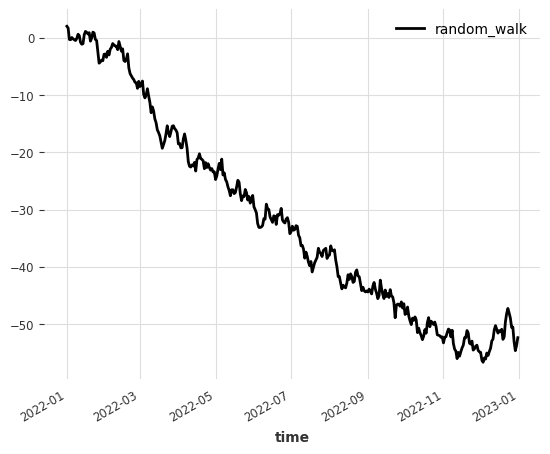

In [5]:
ts.plot();

---
## Custom Class Creation

### Create custom model

In [6]:
from ontime.abstract import AbstractBaseModel


class MyModel(AbstractBaseModel):

    def __init__(self):
        super().__init__()

    def fit(self, series):
        super().fit(series)
        print('I am fitted')

    def predict(self, n):
        super().predict(n)
        print('I predicted')


Load custom model in OnTime

In [7]:
on.models.get_all()

['arima', 'catboost', 'TCN']

In [8]:
on.models.load('my_model', MyModel)
on.models.get_all()

['arima', 'catboost', 'TCN', 'my_model']

In [9]:
m = on.models.my_model()

In [10]:
m.fit(ts)

I am fitted


In [11]:
m.predict(5)

I predicted


### Create custom detector

In [12]:
from ontime.abstract import AbstractBaseDetector


class MyDetector(AbstractBaseDetector):

    def __init__(self):
        super().__init__()

    def detect(self, ts):
        print('I detected')


Load custom detector in OnTime

In [13]:
on.detectors.get_all()

['threshold', 'quantile']

In [14]:
on.detectors.load('my_detector', MyDetector)

In [15]:
on.detectors.get_all()

['threshold', 'quantile', 'my_detector']

In [16]:
on.detectors.my_detector().detect(ts)

I detected


# GenericDetector

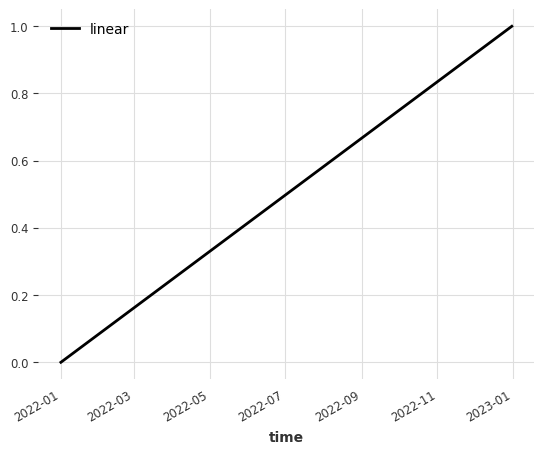

In [17]:
linear_ts = on.generators.linear().generate(start=pd.Timestamp('2022-01-01'),
                                            end=pd.Timestamp('2022-12-31'))
linear_ts.plot();

In [18]:
probabilistic_ts = on.time_series.ProbabilisticTimeSeries.from_darts(linear_ts)
probabilistic_ts

<TimeSeries (DataArray) (time: 365, component: 1, sample: 1)>
array([[[0.        ]],

       [[0.00274725]],

       [[0.00549451]],

       [[0.00824176]],

       [[0.01098901]],

       [[0.01373626]],

       [[0.01648352]],

       [[0.01923077]],

       [[0.02197802]],

       [[0.02472527]],

...

       [[0.97527473]],

       [[0.97802198]],

       [[0.98076923]],

       [[0.98351648]],

       [[0.98626374]],

       [[0.98901099]],

       [[0.99175824]],

       [[0.99450549]],

       [[0.99725275]],

       [[1.        ]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
  * component  (component) object 'linear'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [20]:
# see error : 
try :
    binary_ts = on.time_series.BinaryTimeSeries.from_darts(linear_ts)
except Exception as e:
    print(e)

Input DataArray contains values outside of {0; 1}


In [ ]:
# try append
